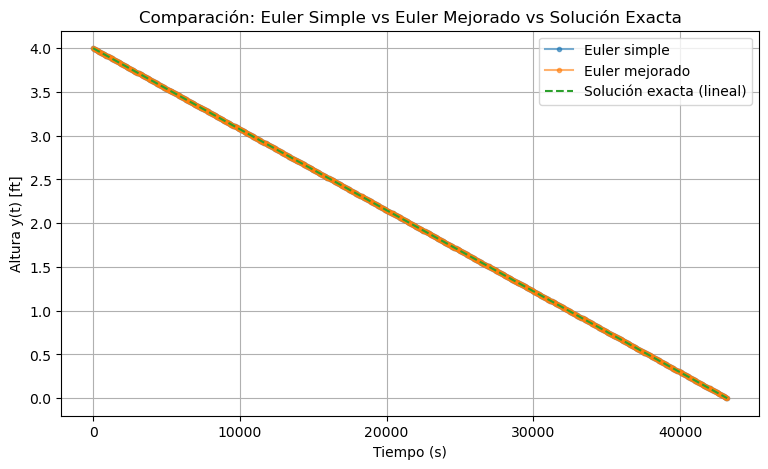

In [ ]:
import math, numpy as np
import matplotlib.pyplot as plt

g = 32.0
y0 = 4.0
t_final = 12 * 3600.0
C_ft_per_s = (4.0/12.0) / 3600.0  # 4 in/h -> ft/s

r_propuesto = math.sqrt(3) / 720.0
#r_menor=0.002
#r_mayor=0.003
a = math.pi * r_propuesto**2

def A_of_y(y):
    return math.pi * math.sqrt(y) / 2.0

def f_torricelli(t, y):
    if y<=0:
        return 0.0
    return - a * math.sqrt(2.0 * g * y) / A_of_y(y)

    

def euler_explicit(f, t0, y0, dt, t_end):
    n_steps = int(np.floor((t_end - t0) / dt))
    ts = np.empty(n_steps+1); ys = np.empty(n_steps+1)
    ts[0] = t0; ys[0] = y0
    t = t0; y = y0
    for i in range(n_steps):
        y = y + dt * f(t, y)
        t = t + dt
        ts[i+1] = t; ys[i+1] = y
    if abs(t_end - t) > 1e-12:
        dt_last = t_end - t
        y = y + dt_last * f(t, y)
        t = t_end
        ts = np.append(ts, t); ys = np.append(ys, y)
    return ts, ys

def euler_mejorado(f, t0, y0, dt, t_end):
    n_steps = int(np.floor((t_end - t0) / dt))
    ts = np.empty(n_steps+1)
    ys = np.empty(n_steps+1)
    
    ts[0] = t0
    ys[0] = y0
    t = t0
    y = y0

    for i in range(n_steps):
        f1 = f(t, y)
        y_predict = y + dt * f1          # predictor
        f2 = f(t + dt, y_predict)        # slope at predicted point
        y = y + dt * (f1 + f2)/2.0       # corrector (promedio)
        
        t = t + dt
        ts[i+1] = t
        ys[i+1] = y

    return ts, ys

dt = 60.0
ts_e, ys_e = euler_explicit(f_torricelli, 0.0, y0, dt, t_final)
ts_m, ys_m = euler_mejorado(f_torricelli, 0.0, y0, dt, t_final)
ys_exact = y0 - C_ft_per_s * ts_e


plt.figure(figsize=(9,5))

plt.plot(ts_e, ys_e, label="Euler simple", marker='.', alpha=0.6)
plt.plot(ts_m, ys_m, label="Euler mejorado", marker='.', alpha=0.6)
plt.plot(ts_e, ys_exact, label="Solución exacta (lineal)", linestyle='--')

plt.xlabel("Tiempo (s)")
plt.ylabel("Altura y(t) [ft]")
plt.title("Comparación: Euler Simple vs Euler Mejorado vs Solución Exacta")
plt.grid(True)
plt.legend()
plt.show()


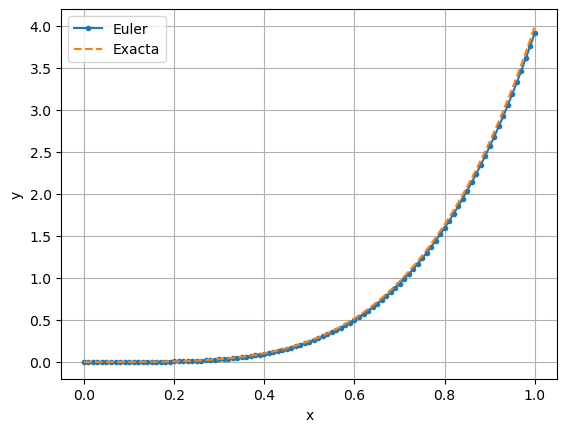

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
g = 32
C = (4/12)/3600         # ft/s
r = np.sqrt(3)/720      # ft

A = (r**2 * np.sqrt(2*g)) / C
k = (1/A)**2            # constante de la curva y = k x^4

# Definición de la EDO dy/dx = 4k x^3
def f(x, y):
    return 4 * k * x**3

# Método de Euler
def euler_xy(f, x0, y0, h, xmax):
    xs = [x0]
    ys = [y0]
    x = x0
    y = y0

    while x < xmax:
        y = y + h * f(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

xs, ys = euler_xy(f, 0, 0, 0.01, 1)

# Solución exacta para comparar
ys_exact = k * xs**4

plt.plot(xs, ys, label="Euler", marker=".")
plt.plot(xs, ys_exact, label="Exacta", linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()
